In [129]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data

In [130]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

## Finding X,Y

In [131]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')
def find_x_y(data):
    Y = data[:, -1]
    X = np.delete(data, -1, axis=1)
    scaler = StandardScaler()
    X= scaler.fit_transform(X)
    return X, Y

label_dict = {0: 'T_shirtst', 1:'Trouseres', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

train_x, train_y = find_x_y(train)
test_x, test_y = find_x_y(test)

## Finding the best parameter K(number of neighnors)

Text(0, 0.5, 'Accuracy Score')

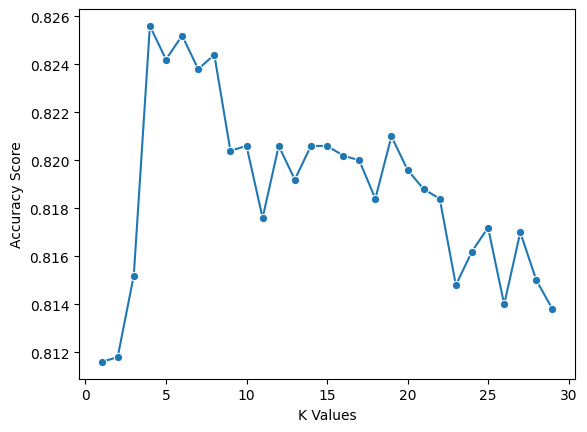

In [132]:
Ks=[i for i in range(1,30)]

train_accs=[]
test_accs=[]
for K in Ks:
    knn=KNeighborsClassifier(K)
    knn.fit(train_x,train_y)
    pred_y = knn.predict(test_x)
    acc_test = accuracy_score(test_y, pred_y)
    test_accs.append(acc_test)

sns.lineplot(x = Ks, y = test_accs, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

The best value of K

In [133]:
best_index = np.argmax(test_accs)
best_k = Ks[best_index]
best_k

4

## Training and Testing

In [134]:
knnK= KNeighborsClassifier(best_k).fit(train_x,train_y)
pred_y = knnK.predict(test_x)

In [136]:
accuracy_score(test_y,pred_y)

0.8256

In [137]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.86      0.82      1000
           3       0.91      0.88      0.89      1000
           4       0.71      0.55      0.62      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.82      5000
weighted avg       0.83      0.83      0.82      5000



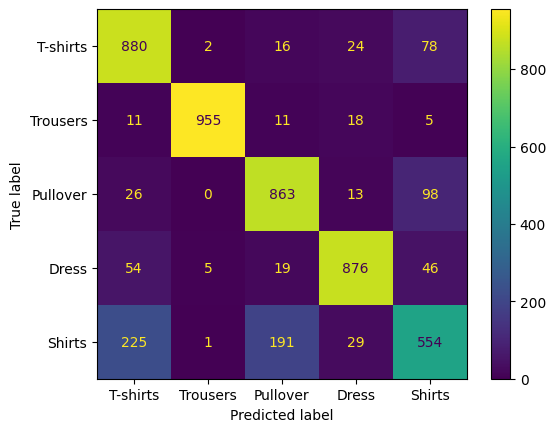

In [138]:
confusion_matrix=confusion_matrix(test_y,pred_y)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['T-shirts','Trousers','Pullover','Dress','Shirts'])
cm_display.plot()